#Assignment 10

* Repeat assignment 9 using new mehods you learnt, interacting with drive to import/export datasets.

* Save datasets and generated figures to a file.

##Mounting the drive and importing modules

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
DataFolderPath = "/content/gdrive/MyDrive/EETBS /Data"

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

##Reading files

**FileName** variables:

In [7]:
ConsumptionFileName = "consumption_5545.csv"
WeatherFileName = "Austin_weather_2014.csv"
IrradianceFileName = "irradiance_2014_gen.csv"

**FilePath** variables using **os.path.join**:

In [8]:
ConsumptionFilePath = os.path.join(DataFolderPath,ConsumptionFileName)
WeatherFilePath = os.path.join(DataFolderPath,WeatherFileName)
IrradianceFilePath = os.path.join(DataFolderPath,IrradianceFileName)

##Importing datafiles as dataframes

Consumption dataframe:

In [9]:
DF_consumption = pd.read_csv(ConsumptionFilePath,index_col=0)
DF_consumption.index = pd.to_datetime(DF_consumption.index)
DF_consumption.head(3)

,air conditioner_5545
2014-01-01 06:00:00,0.0
2014-01-01 07:00:00,0.0
2014-01-01 08:00:00,0.0


Temperature dataframe, extracting from weather dataframe:

In [10]:
DF_weather = pd.read_csv(WeatherFilePath,
                         sep=";",
                         index_col=["localhour"],
                         parse_dates=["localhour"],
                         date_parser=lambda col: pd.to_datetime(col, utc=True).tz_convert("US/Central").tz_localize(None)
                         )
DF_weather.head(3)

,latitude,longitude,tz_offset,summary,ozone,ozone_error,temperature,temperature_error,dew_point,dew_point_error,humidity,humidity_error,visibility,visibility_error,apparent_temperature,apparent_temperature_error,pressure,pressure_error,wind_speed,wind_speed_error,cloud_cover,cloud_cover_error,wind_bearing,precip_intensity,precip_intensity_error,precip_probability,precip_type
localhour,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,30.292432,-97.699662,-6,Clear,NaN,NaN,40.36,NaN,30.12,NaN,0.67,NaN,10.00,NaN,36.89,NaN,1025.10,NaN,5.00,NaN,0.0,NaN,200.0,0.0,NaN,0.0,NaN
2014-01-01 01:00:00,30.292432,-97.699662,-6,Clear,NaN,NaN,38.11,NaN,30.46,NaN,0.74,NaN,9.77,NaN,33.79,NaN,1024.50,NaN,5.60,NaN,0.0,NaN,196.0,0.0,NaN,0.0,NaN
2014-01-01 02:00:00,30.292432,-97.699662,-6,Clear,NaN,NaN,38.65,NaN,31.92,NaN,0.77,NaN,8.46,NaN,35.80,NaN,1024.03,NaN,3.96,NaN,0.0,NaN,191.0,0.0,NaN,0.0,NaN


In [11]:
DF_temperature = DF_weather[["temperature"]]
DF_temperature.head(3)

,temperature
localhour,
2014-01-01 00:00:00,40.36
2014-01-01 01:00:00,38.11
2014-01-01 02:00:00,38.65


Irradiance dataframe

In [12]:
DF_irradiance = pd.read_csv(IrradianceFilePath,
                            sep=";",
                            index_col=["localhour"],
                            parse_dates=["localhour"]
                            )
DF_irradiance.head(3)

,dataid,use,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,bedroom2,bedroom3,bedroom4,bedroom5,car1,clotheswasher1,clotheswasher_dryg1,diningroom1,diningroom2,dishwasher1,disposal1,drye1,dryg1,freezer1,furnace1,furnace2,garage1,garage2,gen,grid,heater1,housefan1,icemaker1,jacuzzi1,kitchen1,kitchen2,kitchenapp1,kitchenapp2,lights_plugs1,lights_plugs2,lights_plugs3,lights_plugs4,lights_plugs5,lights_plugs6,livingroom1,livingroom2,microwave1,office1,outsidelights_plugs1,outsidelights_plugs2,oven1,oven2,pool1,pool2,poollight1,poolpump1,pump1,range1,refrigerator1,refrigerator2,security1,shed1,sprinkler1,utilityroom1,venthood1,waterheater1,waterheater2,winecooler1
localhour,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,8236,0.303150,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0051,0.0306,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.019717,NaN,NaN,NaN,-0.005967,0.303150,NaN,NaN,NaN,NaN,NaN,NaN,0.004,0.0,0.0036,0.00115,NaN,NaN,NaN,NaN,NaN,NaN,0.075033,0.0079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.051567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 01:00:00,8236,0.358567,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.171067,NaN,NaN,NaN,-0.006317,0.358567,NaN,NaN,NaN,NaN,NaN,NaN,0.004,0.0,0.0000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.074750,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 02:00:00,8236,0.367283,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.178183,NaN,NaN,NaN,-0.006350,0.367283,NaN,NaN,NaN,NaN,NaN,NaN,0.004,0.0,0.0000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.074883,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
DF_irradiance = DF_irradiance[["gen"]]
DF_irradiance.head(3)

,gen
localhour,
2014-01-01 00:00:00,-0.005967
2014-01-01 01:00:00,-0.006317
2014-01-01 02:00:00,-0.006350


In [14]:
DF_irradiance.loc[DF_irradiance.loc[:,"gen"]<0] = 0
DF_irradiance.head(3)

,gen
localhour,
2014-01-01 00:00:00,0.0
2014-01-01 01:00:00,0.0
2014-01-01 02:00:00,0.0


##Joining dataframes as a single desired dataframe

In [15]:
DF_joined = DF_consumption.join([DF_temperature,DF_irradiance])
DF_joined.tail(3)

,air conditioner_5545,temperature,gen
2014-12-31 03:00:00,NaN,39.33,0.0
2014-12-31 04:00:00,NaN,39.54,0.0
2014-12-31 05:00:00,NaN,38.99,0.0


In [16]:
DF_joined = DF_joined.rename(columns={"air conditioner_5545":"Consumption",
                                      "temperature":"Temperature",
                                      "gen":"Irradiance"})
DF_joined.tail(3)

,Consumption,Temperature,Irradiance
2014-12-31 03:00:00,NaN,39.33,0.0
2014-12-31 04:00:00,NaN,39.54,0.0
2014-12-31 05:00:00,NaN,38.99,0.0


Handling "NaN" values:

In [17]:
DF_joined.dropna(inplace=True)
DF_joined.tail(3)

,Consumption,Temperature,Irradiance
2014-12-30 22:00:00,0.0,40.15,0.0
2014-12-30 23:00:00,0.0,40.00,0.0
2014-12-31 00:00:00,0.0,38.74,0.0


Saving joined dataframe as a excel file:

In [18]:
DF_joinedFileName = "Week10_DF_joined"
SaveFolderPath = "/content/gdrive/MyDrive/Colab Notebooks/N-EETBS Assignments/Saved Files"
DF_joinedFilePath = os.path.join(SaveFolderPath,DF_joinedFileName)
DF_joined.to_csv(DF_joinedFilePath)


##Plot

Plot the consumption profile for July 10th between 8 AM to 9 PM:

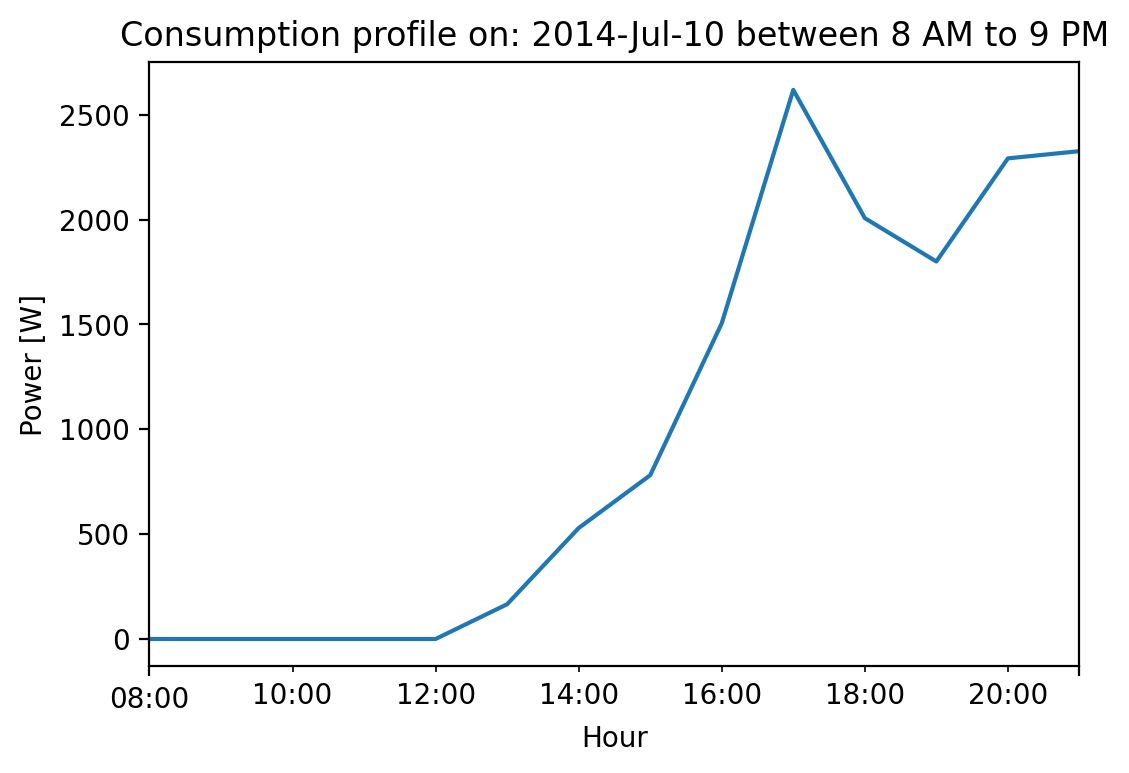

In [27]:
fig1 = plt.figure(figsize=(6,4),dpi=200)

DF_joined.loc["2014-07-10 08:00:00":"2014-07-10 21:00:00"]["Consumption"].plot()
plt.title("Consumption profile on: 2014-Jul-10 between 8 AM to 9 PM")
plt.xlabel("Hour")
plt.ylabel("Power [W]")

fig1FileName = "Week10_Consumption_figure.jpg"
fig1FilePath = os.path.join(SaveFolderPath,fig1FileName)
plt.savefig(fig1FilePath)

Plot the temperature and irradiance profile for July 10th between 8 AM to 9 PM is subplots:

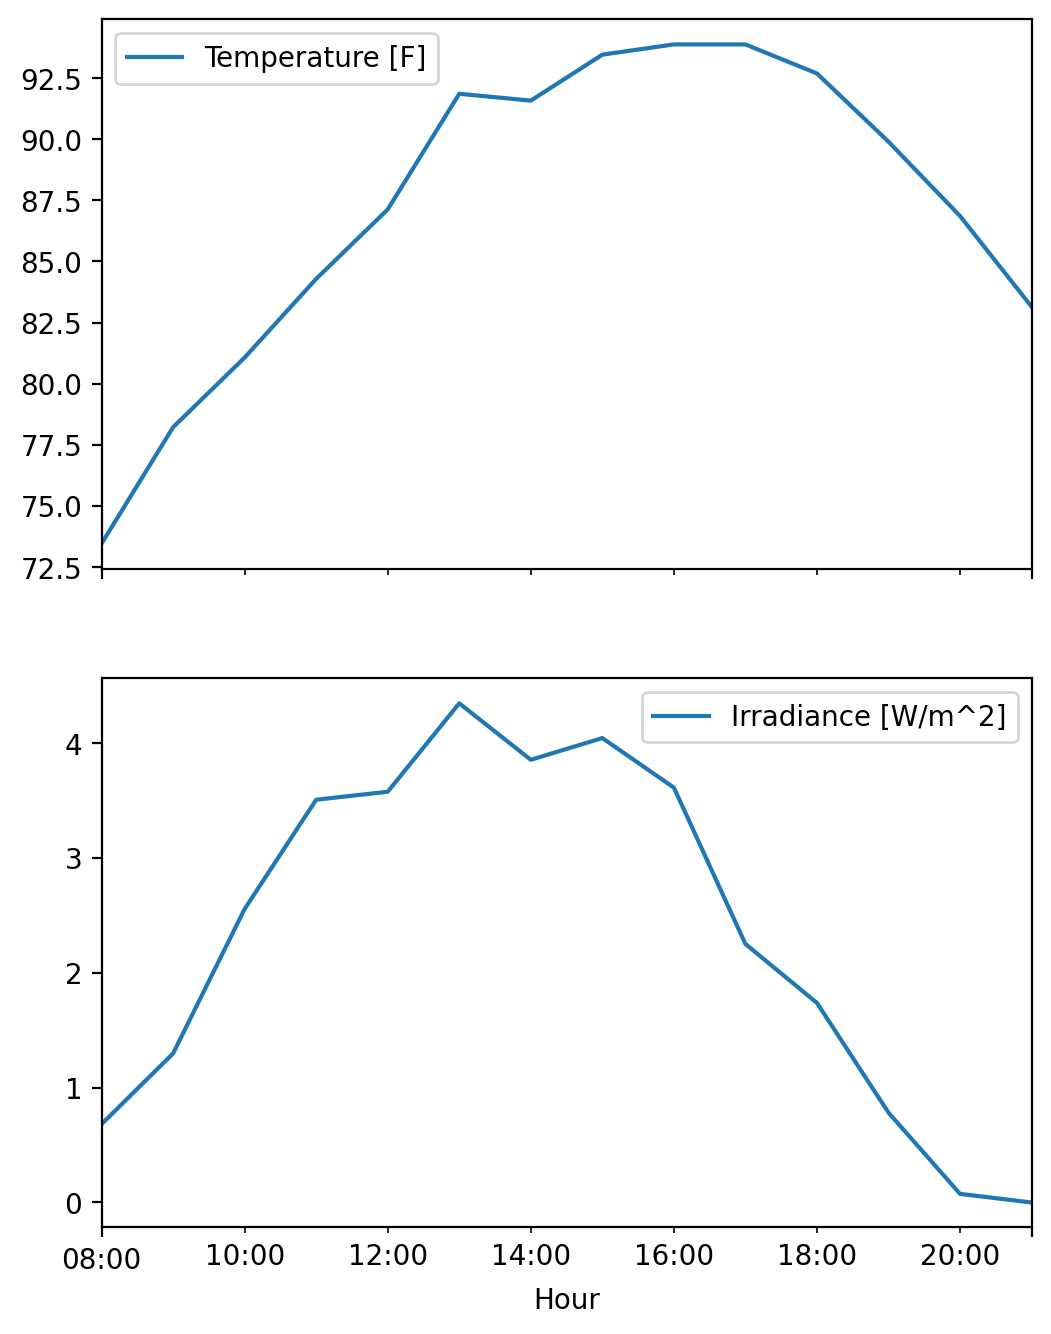

In [28]:
fig2,axs = plt.subplots(nrows=2,ncols=1,figsize=(6,8),dpi=200,sharex=True)

DF_joined.loc["2014-07-10 08:00:00":"2014-07-10 21:00:00"]["Temperature"].plot(ax=axs[0])
axs[0].legend(["Temperature [F]"])

DF_joined.loc["2014-07-10 08:00:00":"2014-07-10 21:00:00"]["Irradiance"].plot(ax=axs[1])
axs[1].legend(["Irradiance [W/m^2]"])

plt.xlabel("Hour")

fig2FileName = "Week10_Temperature_Irradiance_figure.jpg"
fig2FilePath = os.path.join(SaveFolderPath,fig2FileName)
plt.savefig(fig2FilePath)


##Define and add new columns

Adding "Hour" column:

In [30]:
DF_joined["Hour"] = DF_joined.index.hour
DF_joined.head(3)

,Consumption,Temperature,Irradiance,Hour
2014-01-01 06:00:00,0.0,39.36,0.000000,6
2014-01-01 07:00:00,0.0,37.86,0.052800,7
2014-01-01 08:00:00,0.0,38.97,0.773583,8


Adding "Day of Week" column:

In [31]:
DF_joined["Day of Week"] = DF_joined.index.dayofweek
DF_joined.head(3)

,Consumption,Temperature,Irradiance,Hour,Day of Week
2014-01-01 06:00:00,0.0,39.36,0.000000,6,2
2014-01-01 07:00:00,0.0,37.86,0.052800,7,2
2014-01-01 08:00:00,0.0,38.97,0.773583,8,2


Adding "Month" column:

In [32]:
DF_joined["Month"] = DF_joined.index.month
DF_joined.head(3)

,Consumption,Temperature,Irradiance,Hour,Day of Week,Month
2014-01-01 06:00:00,0.0,39.36,0.000000,6,2,1
2014-01-01 07:00:00,0.0,37.86,0.052800,7,2,1
2014-01-01 08:00:00,0.0,38.97,0.773583,8,2,1


Adding "Week of Year" column:

In [33]:
DF_joined["Week of Year"] = DF_joined.index.weekofyear
DF_joined.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


,Consumption,Temperature,Irradiance,Hour,Day of Week,Month,Week of Year
2014-01-01 06:00:00,0.0,39.36,0.000000,6,2,1,1
2014-01-01 07:00:00,0.0,37.86,0.052800,7,2,1,1
2014-01-01 08:00:00,0.0,38.97,0.773583,8,2,1,1


Adding "Weekend Flag": For this, we need to use boolean values based on "Day of Week" column:

In [37]:
DF_joined["Weekend Flag"] = 0

#Extracting the weekend days in a boolean serie:
DF_joined.loc[:,"Day of Week"] == 0

#Updating the created "Weekend Flag" column:
DF_joined.loc[(DF_joined.loc[:,"Day of Week"] == 0),"Weekend Flag"] = 1
DF_joined.loc["2014-01-06 07:00:00"]

Consumption      0.0000
Temperature     21.8100
Irradiance       0.0155
Hour             7.0000
Day of Week      0.0000
Month            1.0000
Week of Year     2.0000
Weekend Flag     1.0000
Name: 2014-01-06 07:00:00, dtype: float64

Save the updated joined dataframe:

In [38]:
DF_joinedFileName = "Week10_DF_joined_extra"
DF_joinedFilePath = os.path.join(SaveFolderPath,DF_joinedFileName)
DF_joined.to_csv(DF_joinedFilePath)